In [1]:
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
import os
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [4]:
path_to_data = './'
csv_files = [pos_csv for pos_csv in os.listdir(path_to_data) if pos_csv.endswith('.csv')]

In [5]:
csv_files

['20131025000.csv',
 '20131050000.csv',
 '20131075000.csv',
 '20131100000.csv',
 '20131125000.csv',
 '20131150000.csv',
 '20131175000.csv',
 '20131200000.csv',
 '20131225000.csv',
 '2013125000.csv',
 '20131250000.csv',
 '20131275000.csv',
 '20131300000.csv',
 '20131325000.csv',
 '20131350000.csv',
 '20131375000.csv',
 '20131400000.csv',
 '20131425000.csv',
 '20131450000.csv',
 '20131475000.csv',
 '2013150000.csv',
 '20131500000.csv',
 '2013175000.csv',
 '20131e+05.csv',
 '20131e+06.csv',
 '2013225000.csv',
 '201325000.csv',
 '2013250000.csv',
 '2013275000.csv',
 '20132e+05.csv',
 '2013325000.csv',
 '2013350000.csv',
 '2013375000.csv',
 '20133e+05.csv',
 '2013425000.csv',
 '2013450000.csv',
 '2013475000.csv',
 '20134e+05.csv',
 '201350000.csv',
 '2013525000.csv',
 '2013550000.csv',
 '2013575000.csv',
 '20135e+05.csv',
 '2013625000.csv',
 '2013650000.csv',
 '2013675000.csv',
 '20136e+05.csv',
 '2013725000.csv',
 '201375000.csv',
 '2013750000.csv',
 '2013775000.csv',
 '20137e+05.csv',
 '2

In [6]:
data=[]
for file in csv_files:
    tmp=pd.read_csv(file,engine='python')
    data.append(tmp)
data=pd.concat(data)

In [ ]:
backup = data

In [ ]:
data.shape

In [ ]:
data.columns

In [46]:
new_col=['dec0_t1', 'dec1_t1', 'dec2_t1', 'dec3_t1', 'dec4_t1', 'dec5_t1','dec6_t1', 'dec7_t1', 'dec8_t1', 'dec9_t1','dir0_t1', 'dir1_t1', 'dir2_t1', 'dir3_t1', 'dir4_t1', 'dir5_t1','dir6_t1', 'dir7_t1', 'dir8_t1', 'dir9_t1','dec0_t2','dec1_t2','dec2_t2', 'dec3_t2', 'dec4_t2', 'dec5_t2', 'dec6_t2', 'dec7_t2','dec8_t2', 'dec9_t2','dir0_t2', 'dir1_t2','dir2_t2', 'dir3_t2', 'dir4_t2', 'dir5_t2', 'dir6_t2', 'dir7_t2','dir8_t2', 'dir9_t2','dec0_t3', 'dec1_t3', 'dec2_t3', 'dec3_t3','dec4_t3', 'dec5_t3', 'dec6_t3', 'dec7_t3', 'dec8_t3', 'dec9_t3','dir0_t3', 'dir1_t3', 'dir2_t3', 'dir3_t3','dir4_t3', 'dir5_t3', 'dir6_t3', 'dir7_t3', 'dir8_t3', 'dir9_t3','prono']

In [47]:
data.shape

(1767297, 61)

In [48]:
data=data[new_col]

In [12]:
mn_scaler = preprocessing.MinMaxScaler()
d1_fitted=mn_scaler.fit(data.iloc[:,0:30])
d1=mn_scaler.transform(data.iloc[:,0:30])
d2=data.iloc[:,60]

In [13]:
g=mn_scaler.fit(data.iloc[:,0:30]).get_params()

In [ ]:
from pickle import dump
# save the scaler
dump(mn_scaler, open('scaler.pkl', 'wb'))
from pickle import load
scaler = load(open('scaler.pkl', 'rb'))
prueba = scaler.transform(data.iloc[:,0:30])

In [14]:
data=np.hstack((np.array(d1),np.array(d2).reshape((d2.shape[0],1))))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(d1, d2, test_size=0.2)

In [17]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)

In [18]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=4)

In [19]:
#Secuencial

In [20]:
model = keras.Sequential()

In [21]:
model.add(keras.Input(shape=(30,)))

In [22]:
model.add(layers.Dense(2048, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(15, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(4, activation = 'softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              63488     
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                9

In [24]:
model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalCrossentropy(),keras.metrics.CategoricalAccuracy(),'accuracy'])

In [25]:
history = model.fit(X_train,y_train,
          batch_size=60,
          validation_split=0.2,
          epochs=30)

Epoch 1/30
28136/28136 [==============================] - 381s 14ms/step - loss: 0.8377 - categorical_crossentropy: 0.8377 - categorical_accuracy: 0.6580 - accuracy: 0.6580 - val_loss: 0.7867 - val_categorical_crossentropy: 0.7867 - val_categorical_accuracy: 0.6784 - val_accuracy: 0.6784
Epoch 2/30
28136/28136 [==============================] - 363s 13ms/step - loss: 0.8211 - categorical_crossentropy: 0.8211 - categorical_accuracy: 0.6655 - accuracy: 0.6655 - val_loss: 0.7854 - val_categorical_crossentropy: 0.7854 - val_categorical_accuracy: 0.6761 - val_accuracy: 0.6761
Epoch 3/30
28136/28136 [==============================] - 331s 12ms/step - loss: 0.8182 - categorical_crossentropy: 0.8182 - categorical_accuracy: 0.6669 - accuracy: 0.6669 - val_loss: 0.7825 - val_categorical_crossentropy: 0.7825 - val_categorical_accuracy: 0.6760 - val_accuracy: 0.6760
Epoch 4/30
28136/28136 [==============================] - 318s 11ms/step - loss: 0.8168 - categorical_crossentropy: 0.8168 - categori

In [26]:
results = model.evaluate(X_test, y_test, batch_size=15)

35170/35170 [==============================] - 63s 2ms/step - loss: 0.7824 - categorical_crossentropy: 0.7824 - categorical_accuracy: 0.6782 - accuracy: 0.6782


In [27]:
model.save('dir_ff.h5')

In [28]:
pred=model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [63]:
len(X_train)

23259

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
len(y_test)

5815

In [66]:
print(confusion_matrix(pred, y_test))

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [67]:
print(classification_report(pred, y_test, target_names=['Rojo','Amarillo','Verde','Sin Alerta']))

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [ ]:
#LSTM

In [21]:
prueb = np.array(data.iloc[:,np.r_[0:30,60]])  #.reshape((len(data),3,11))

In [8]:
data.iloc[:,np.r_[0:30,60]]

,dec0_t1,dec1_t1,dec2_t1,dec3_t1,dec4_t1,dec5_t1,dec6_t1,dec7_t1,dec8_t1,dec9_t1,...,dec1_t3,dec2_t3,dec3_t3,dec4_t3,dec5_t3,dec6_t3,dec7_t3,dec8_t3,dec9_t3,prono
0,5926.996460,9517.160397,10490.669754,11739.397447,12710.114387,14200.004984,18369.333804,23551.636196,26820.764047,72424.051979,...,10587.157885,12087.533780,14281.108256,16418.512582,19527.570826,22903.055310,26032.309771,84585.129694,161593.051391,1
1,7262.953521,9881.425786,10484.095844,11582.931967,11980.319762,12382.848240,13233.086272,14540.372500,14931.002438,16951.665190,...,10495.042351,12010.173469,13731.304482,14636.590003,15164.543965,16214.730779,16629.792943,17451.973164,18780.431555,1
2,3175.602652,16410.410101,17318.083564,18100.570182,18703.325487,19425.074064,20508.666865,21473.258592,23273.297076,29819.595814,...,16219.485810,17477.593824,18562.471192,19231.774609,20167.056824,21084.100234,23829.604203,29776.699018,32366.856529,3
3,10583.312696,11800.214416,19149.429505,38129.007942,48643.032990,265946.486504,269465.491783,270040.557559,272205.027632,295212.062323,...,12120.032184,24715.833289,34372.215244,41779.273960,163110.025847,269381.314922,270341.534649,273309.209320,294197.074279,2
4,3525.697076,4992.158320,8594.421614,12739.107607,12943.589181,14344.607527,14893.924539,15601.123705,18868.633878,65003.738033,...,4047.006622,4897.798012,7499.723128,11369.332766,12848.154319,14371.173618,15995.910795,64920.090516,298981.550030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24954,6287.305189,10813.578901,32055.993018,54810.770153,60249.233753,62927.018442,150693.251795,152772.573803,166654.338521,270298.385553,...,2737.531919,4752.974198,9962.937503,30404.532625,43382.643225,54568.131804,63259.557554,151821.711197,184761.842614,0
24955,182621.279354,188542.388137,195758.276565,205152.743846,215515.903629,225535.151566,289570.743499,299239.698845,300710.091514,317663.202854,...,188161.940917,192933.090702,210415.555825,215753.935711,227658.919358,264174.223402,298907.842048,301662.437817,308839.364005,3
24956,153459.446445,164677.874558,166968.298008,170395.328363,224682.321215,234429.822035,243004.661533,245106.787454,247547.247916,249541.581083,...,165254.076819,167732.879404,173986.527127,225338.093684,235199.270492,243670.227650,247017.782075,249062.752814,253843.342943,3
24957,393.227987,4410.293282,7057.964229,8840.844906,12018.527798,18830.796585,36021.399735,47960.402999,52012.436405,55645.053441,...,5953.177117,10399.356552,14108.832545,19444.462964,32898.384324,44093.928723,47150.982477,50998.669568,60719.020826,0


In [22]:
feat = np.array(prueb)[:,:30]

In [10]:
scaler = preprocessing.MinMaxScaler()
feat2=scaler.fit_transform(feat)

In [23]:
#features = feat2.reshape((len(prueb),3,10))

NameError: name 'feat2' is not defined

In [24]:
features = feat.reshape((len(prueb),3,10))

In [12]:
resul = np.array(prueb)[:,30]

In [13]:
features.shape

(3759674, 3, 10)

In [14]:
features[0]

array([[0.00980024, 0.01469578, 0.01372492, 0.01514417, 0.01591004,
        0.01736157, 0.022425  , 0.02869717, 0.03260133, 0.0879205 ],
       [0.00980052, 0.0165552 , 0.01520179, 0.01636076, 0.01791255,
        0.01974491, 0.0258869 , 0.02898682, 0.04369142, 0.19426508],
       [0.00980157, 0.01706141, 0.01579245, 0.01821313, 0.02031054,
        0.02387621, 0.02787892, 0.03162214, 0.10289653, 0.19607357]])

In [80]:
len(d2)

16897

In [15]:
def separar_secuencia(secuencia,pasos_tiempo):
    x, y = list(), list()
    for i in range(len(secuencia)):
        final_ix = i +pasos_tiempo
        if final_ix > len(secuencia)-1:
            break
        #juntamos la serie y resultado del siguiente paso
        seq_x, seq_y = secuencia[i:final_ix,:-1], secuencia[final_ix-1,-1]
        x.append(seq_x)
        y.append(seq_y)
        
    return np.array(x), np.array(y)

In [16]:
data.iloc[0,:30].index

Index(['dec0_t1', 'dec1_t1', 'dec2_t1', 'dec3_t1', 'dec4_t1', 'dec5_t1',
       'dec6_t1', 'dec7_t1', 'dec8_t1', 'dec9_t1', 'dec0_t2', 'dec1_t2',
       'dec2_t2', 'dec3_t2', 'dec4_t2', 'dec5_t2', 'dec6_t2', 'dec7_t2',
       'dec8_t2', 'dec9_t2', 'dec0_t3', 'dec1_t3', 'dec2_t3', 'dec3_t3',
       'dec4_t3', 'dec5_t3', 'dec6_t3', 'dec7_t3', 'dec8_t3', 'dec9_t3'],
      dtype='object')

In [14]:
tserie=3

In [18]:
x, y = separar_secuencia(prueb,tserie)

In [24]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, resul, test_size=0.2)

In [23]:
y_train2= tf.keras.utils.to_categorical(y_train2,num_classes=4)
y_test2 = tf.keras.utils.to_categorical(y_test2,num_classes=4)

In [22]:
feat_num=len(X_train2[0][0])

In [12]:
def modelo_lstm(pasos_tiempo3,feat_num): 
    model3 = keras.Sequential()
    model3.add(layers.LSTM(1024,
                   return_sequences = True,
                   input_shape = (pasos_tiempo3,feat_num)))
    model3.add(layers.Dropout(0.5))
    model3.add(layers.LSTM(256))
    model3.add(layers.Dropout(0.5))
    model3.add(layers.Dense(256,activation = 'relu'))
    model3.add(layers.Dropout(0.3))
    model3.add(layers.Dense(64,activation = 'relu'))
    model3.add(layers.Dropout(0.3))
    model3.add(layers.Dense(4, activation='softmax'))
    model3.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])
    return model3

In [18]:
feat_num=30

In [19]:
model2 = modelo_lstm(tserie,feat_num)

In [20]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3, 1024)           4321280   
_________________________________________________________________
dropout (Dropout)            (None, 3, 1024)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               1311744   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1

In [43]:
y.shape

(29071,)

In [26]:
model2.fit(X_train2, y_train2, validation_split = 0.2,batch_size=60, epochs=10)

Epoch 1/10
38245/38245 [==============================] - 5329s 139ms/step - loss: 0.7515 - accuracy: 0.6962 - val_loss: 0.7246 - val_accuracy: 0.7033
Epoch 2/10
38245/38245 [==============================] - 5440s 142ms/step - loss: 0.7374 - accuracy: 0.7003 - val_loss: 0.7242 - val_accuracy: 0.7042
Epoch 3/10
38245/38245 [==============================] - 5149s 135ms/step - loss: 0.7335 - accuracy: 0.7019 - val_loss: 0.7227 - val_accuracy: 0.7060
Epoch 4/10
38245/38245 [==============================] - 4950s 129ms/step - loss: 0.7309 - accuracy: 0.7029 - val_loss: 0.7196 - val_accuracy: 0.7079
Epoch 5/10
38245/38245 [==============================] - 4694s 123ms/step - loss: 0.7290 - accuracy: 0.7033 - val_loss: 0.7159 - val_accuracy: 0.7083
Epoch 6/10
38245/38245 [==============================] - 4750s 124ms/step - loss: 0.7275 - accuracy: 0.7038 - val_loss: 0.7177 - val_accuracy: 0.7072
Epoch 7/10
38245/38245 [==============================] - 5043s 132ms/step - loss: 0.7265 - ac

In [28]:
model2.evaluate(X_test2, y_test2)

22410/22410 [==============================] - 478s 21ms/step - loss: 0.7152 - accuracy: 0.7076


[0.7152378559112549, 0.7075746655464172]

In [20]:
model2 = tf.keras.models.load_model('lstm.h5')

In [28]:
predictions = model2.predict_classes(X_test2)

In [26]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [30]:
len(predictions)

751935

In [45]:
cm = confusion_matrix(y_true=y_test2, y_pred=predictions)

In [49]:
cm

array([[ 94425,  17367,   8040,  10275],
       [ 41284,  26503,  16694,  19873],
       [ 14266,  17987,  26551,  40062],
       [  7365,   8706,  16871, 385666]])

In [58]:
cm2 = np.round(cm*100 / cm.astype(np.float).sum(axis=1, keepdims=True))

In [60]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Matriz de Confusion',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [61]:
cm_plot_labels = ['Rojo','Amarillo','Verde','Sin Riesgo']

Confusion matrix, without normalization
[[73. 13.  6.  8.]
 [40. 25. 16. 19.]
 [14. 18. 27. 41.]
 [ 2.  2.  4. 92.]]


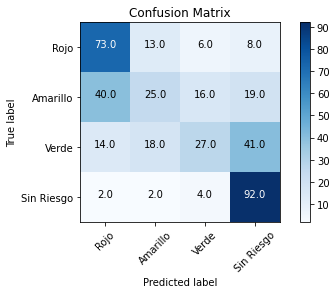

In [62]:
plot_confusion_matrix(cm=cm2, classes=cm_plot_labels, title='Confusion Matrix')

In [27]:
model2.save('./lstm.h5')